In [1]:
import fusao_variaveis as fus
import pandas as pd
from bson.objectid import ObjectId

In [ ]:
# Arquivo usando a api criada para pegar dados.

In [2]:
dict_query = { "$and": [{"id_experimento": ObjectId("5ea1a82993f4d56ba41e567d")}, 
                        {"var_ind.sexo":"macho"},{"$or": [{"var_ind.dosagem": "flx2.5mg"},
                                 {"var_ind.dosagem": "veiculo"} ]}
                        ]}

# dict_query = {"id_experimento": ObjectId("5ea1a82993f4d56ba41e567d")}

# dict_query = { "$and": [{"id_experimento": ObjectId("5ea1a82993f4d56ba41e567d")}, 
#                         {"var_ind.sexo":"femea"},{"$or": [{"var_ind.dosagem": "veiculo"} ]}
#                         ]}

# dict_query = { "$and": [{"id_experimento": ObjectId("5ea1a82993f4d56ba41e567d")}, 
#                         {"var_ind.sexo":"femea"} ]}

In [3]:
fs = fus.Fusao_variaveis(dict_query)

In [4]:
# fs.set_variaveis_rastreamento(["@Vd", "@Van"])
# fs.set_variaveis_etografia(["nome", "trecho", "q_inicial", "q_final"])
fs.set_variaveis_juncao(["sexo", "dosagem", "unidade"])

li_str_descritores = ["duracao", "frequencia", "duracao_total"]
li_str_categora = ["Immobility", "Swimming"]
fs.set_variaveis_descritore_eto_experimento(li_str_descritores, li_str_categora)

In [5]:
df = fs.get_dados_fundidos()

In [6]:
df

,d_e_Immobility_s,f_e_Immobility_s,d_total_experimento,d_e_Swimming_s,f_e_Swimming_s,d_total_experimento,id_eto,id_j,sexo,dosagem,unidade
0,31.466667,41,297.500000,8.633333,17,297.500000,5ea2305793f4d55ef029829b,5ea2305793f4d55ef0298297,macho,flx2.5mg,A1
1,34.566667,44,247.800000,10.366667,19,247.800000,5ea2305793f4d55ef02982a4,5ea2305793f4d55ef02982a0,macho,flx2.5mg,A2
2,47.900000,54,247.800000,6.166667,22,247.800000,5ea2305793f4d55ef02982ad,5ea2305793f4d55ef02982a9,macho,flx2.5mg,A2
3,33.600000,38,244.400000,13.800000,15,244.400000,5ea2305893f4d55ef02982b6,5ea2305893f4d55ef02982b2,macho,flx2.5mg,A2
4,47.466667,53,246.433333,8.500000,24,246.433333,5ea2305893f4d55ef02982bf,5ea2305893f4d55ef02982bb,macho,flx2.5mg,A2
5,119.900000,61,246.666667,10.400000,34,246.666667,5ea2305893f4d55ef02982c8,5ea2305893f4d55ef02982c4,macho,flx2.5mg,A3
6,64.633333,45,245.700000,12.966667,29,245.700000,5ea2305993f4d55ef02982d1,5ea2305993f4d55ef02982cd,macho,flx2.5mg,A4
7,87.966667,105,247.500000,22.500000,57,247.500000,5ea2305993f4d55ef02982da,5ea2305993f4d55ef02982d6,macho,flx2.5mg,A5
8,79.466667,81,247.700000,23.533333,43,247.700000,5ea2305993f4d55ef02982e3,5ea2305993f4d55ef02982df,macho,flx2.5mg,A6
9,92.466667,81,247.233333,16.900000,40,247.233333,5ea2305a93f4d55ef02982ec,5ea2305a93f4d55ef02982e8,macho,flx2.5mg,A6


In [7]:
df.to_csv("machos.csv", index=False)

In [8]:
df["dosagem_n"] = df["dosagem"].map({"flx1mg":1,"flx5mg":5,'flx2.5mg': 2.5, 'veiculo': 0})

In [9]:
import matplotlib.pyplot as plt

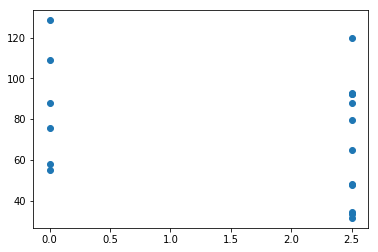

In [10]:
plt.scatter(df["dosagem_n"],df["d_e_Immobility_s"])